In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display, Math, Latex

# Análisis de la evolución de la pandemia en paises (centrado en España)

* Paises analizados: 
    1. España 
    2. Italia
    3. Alemania 
    4. Portugal
    
* Secciones:
    1. España: Estudio centralizado en la evolución de la pandemia en España
    2. Comparación de los datos de evolución de los diferentes paises
    
* Variables a analizar:
    1.	Nº de infecciones por Covid-19 registrados por día
    2.	Nº de infecciones por Covid-19 acumuladas
    3.	Nº de defunciones por Covid-19 registrados por día
    4.	Nº de defunciones por Covid-19 acumuladas
    5.	Nº de recuperaciones de la enfermedad Covid-19 por día
    6.	Nº de recuperaciones del Covid-19 acumuladas
    7.	Variables categóricas de toma de decisión
    8.	Edad o rango de edad
    9.	Nº de habitantes por población
    10.	Densidad de población
    11.	Recursos sanitarios

## Defunciones observadas vs Defunciones previstas

In [2]:
path="Dataset\\Momo_CCAA_2018_2020.csv"

In [3]:
data=pd.read_csv(path)

In [4]:
data.head(10)

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-24,1017,1017.0,1017.0,1014.0,924.05,1127.20
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-25,965,965.0,965.0,1014.0,912.60,1127.20
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-26,1013,1013.0,1013.0,1014.5,912.60,1101.85
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-27,1051,1051.0,1051.0,1015.5,912.60,1101.85
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-28,962,962.0,962.0,1014.5,915.90,1079.80
5,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-29,926,926.0,926.0,1014.5,907.10,1076.35
6,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-30,917,917.0,917.0,1015.5,907.10,1078.45
7,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-07-31,967,967.0,967.0,1011.0,907.10,1078.45
8,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-01,1021,1021.0,1021.0,1007.5,916.80,1079.90
9,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-02,1077,1077.0,1077.0,1015.0,918.08,1101.24


In [5]:
data.tail(10)

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
179750,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-01,0,0.000000,0.164114,0.0,0.0,2.31
179751,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-02,2,2.000000,2.499346,0.0,0.0,2.31
179752,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-03,1,1.000000,1.207284,0.0,0.0,2.31
179753,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-04,3,3.000000,3.415730,0.0,0.0,2.31
179754,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-05,1,1.000000,1.247093,0.0,0.0,2.31
179755,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-06,2,2.000000,2.330427,0.0,0.0,1.31
179756,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-07,1,0.000000,1.775445,0.0,0.0,1.31
179757,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-08,0,0.000000,1.727122,0.0,0.0,2.00
179758,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-09,1,0.342495,2.027369,0.0,0.0,2.00
179759,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-08-10,1,0.073477,2.109549,0.0,0.0,2.00


In [6]:
data.shape

(179760, 15)

In [7]:
#Obteniendo los datos requeridos aplicando filtros
datos_nacionales=data[(data["ambito"]=="nacional") & (data["nombre_gedad"]=="todos") & (data["cod_sexo"]=="all") 
& (data["nombre_sexo"]=="todos")]
datos_nacionales.shape

(749, 15)

In [8]:
datos_nacionales.dtypes

ambito                             object
cod_ambito                         object
cod_ine_ambito                    float64
nombre_ambito                      object
cod_sexo                           object
nombre_sexo                        object
cod_gedad                          object
nombre_gedad                       object
fecha_defuncion                    object
defunciones_observadas              int64
defunciones_observadas_lim_inf    float64
defunciones_observadas_lim_sup    float64
defunciones_esperadas             float64
defunciones_esperadas_q01         float64
defunciones_esperadas_q99         float64
dtype: object

In [9]:
datos_nacionales["fecha_defuncion"]=pd.to_datetime(datos_nacionales["fecha_defuncion"])

<ipython-input-9-a348726bae22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_nacionales["fecha_defuncion"]=pd.to_datetime(datos_nacionales["fecha_defuncion"])


In [10]:
datos_nacionales.dtypes

ambito                                    object
cod_ambito                                object
cod_ine_ambito                           float64
nombre_ambito                             object
cod_sexo                                  object
nombre_sexo                               object
cod_gedad                                 object
nombre_gedad                              object
fecha_defuncion                   datetime64[ns]
defunciones_observadas                     int64
defunciones_observadas_lim_inf           float64
defunciones_observadas_lim_sup           float64
defunciones_esperadas                    float64
defunciones_esperadas_q01                float64
defunciones_esperadas_q99                float64
dtype: object

In [11]:
datos_nacionales[20:30]

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
20,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-13,987,987.0,987.0,1009.0,909.96,1075.56
21,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-14,1022,1022.0,1022.0,1002.0,909.96,1068.52
22,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-15,985,985.0,985.0,995.0,909.96,1075.74
23,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-16,1009,1009.0,1009.0,991.0,909.96,1105.96
24,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-17,1020,1020.0,1020.0,991.0,911.20,1114.02
25,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-18,925,925.0,925.0,984.0,902.34,1114.02
26,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-19,929,929.0,929.0,992.0,902.34,1114.02
27,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-20,884,884.0,884.0,997.0,909.16,1114.02
28,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-21,1043,1043.0,1043.0,997.0,907.30,1114.02
29,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-08-22,973,973.0,973.0,1001.0,895.72,1114.02


In [12]:
x=datos_nacionales["fecha_defuncion"]
y=datos_nacionales["defunciones_observadas"]
y1=datos_nacionales["defunciones_esperadas"]

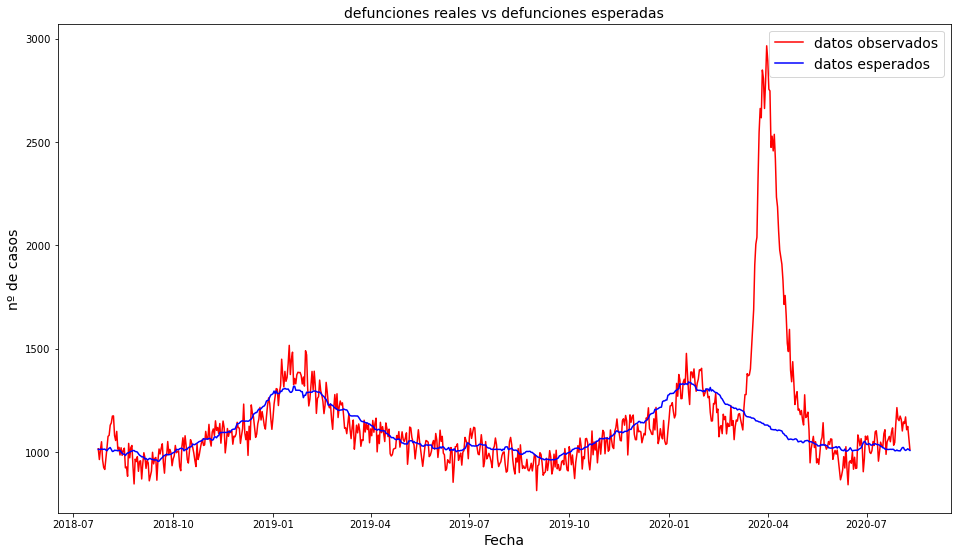

In [13]:
fig, ax=plt.subplots(figsize=(16,9))
ax.plot(x,y,'r',label="datos observados")
ax.plot(x,y1,'b',label="datos esperados")
ax.set_xlabel("Fecha").set_fontsize(14)
ax.set_ylabel("nº de casos").set_fontsize(14)
ax.set_title("defunciones reales vs defunciones esperadas").set_fontsize(14)
ax.legend(prop={"size":14})
plt.show()

## Evolución de los datos de la pandemia España

In [14]:
#Definir el path donde se encuentra el dataset con los datos de confirmados
path1="Dataset\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv"
#Definir el path donde se encuentra el dataset con los datos de muertes
path2="Dataset\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_global.csv"
#Definir el path donde se encuentra el dataset con los datos de recuperados
path3="Dataset\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_recovered_global.csv"

In [15]:
#Datos confirmados acumulados en España
data_confirmed=pd.read_csv(path1)
Data_Confirmed_Spain=data_confirmed[data_confirmed["Country/Region"]=="Spain"]
#Datos defunciones acumuladas en España
data_deaths=pd.read_csv(path2)
Data_Deaths_Spain=data_deaths[data_deaths["Country/Region"]=="Spain"]
#Datos recuperados acumulados en España
data_recovered=pd.read_csv(path3)
Data_Recovered_Spain=data_recovered[data_recovered["Country/Region"]=="Spain"]

In [16]:
#Lista con valores de fecha (comenzando desde la primera  primeras filas)
date_value_list=data_confirmed.columns.values.tolist()
date_value=date_value_list[4:]
#Lista de confirmados
confirmed_value=Data_Confirmed_Spain.iloc[0,4:].tolist()
#Lista de defunciones
deaths_value=Data_Deaths_Spain.iloc[0,4:].tolist()
#Lista de Recuperados
recovered_value=Data_Recovered_Spain.iloc[0,4:].tolist()
#Tamaño de las listas
(len(date_value),len(confirmed_value),len(deaths_value),len(recovered_value))

(217, 217, 217, 217)

In [17]:
#DataFrame España
Spain_Data=pd.DataFrame({
    "Fecha":date_value,
    "Total Confirmados":confirmed_value,
    "Total Defunciones":deaths_value,
    "Total Recuperados":recovered_value
})

In [18]:
#Transformando la fecha en formato fecha
Spain_Data["Fecha"]=pd.to_datetime(Spain_Data["Fecha"])

In [19]:
Spain_Data["Total Recuperados"][175]+Spain_Data["Total Defunciones"][175]

178789

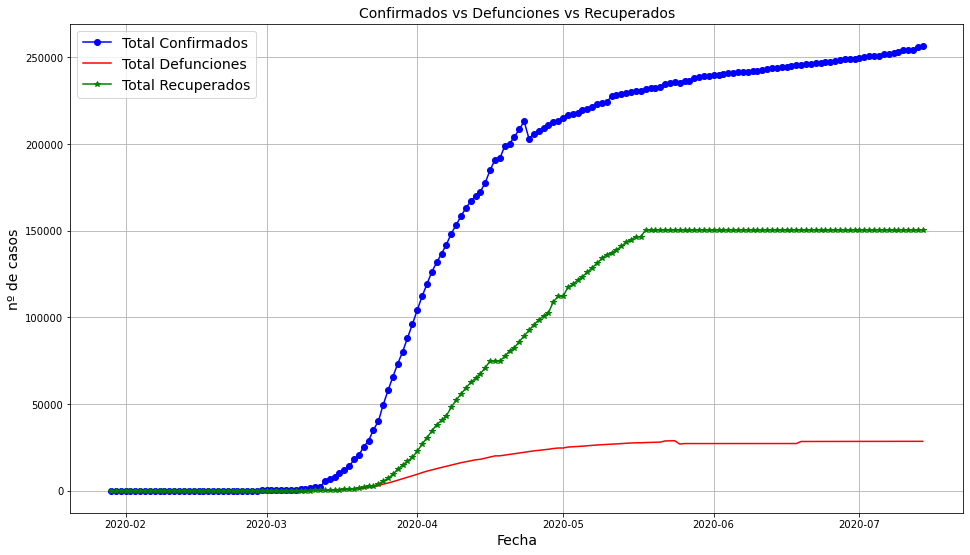

In [20]:
#Analizando los datos (primera ola)
x=Spain_Data["Fecha"][7:175]
y=Spain_Data["Total Confirmados"][7:175]
y1=Spain_Data["Total Defunciones"][7:175]
y2=Spain_Data["Total Recuperados"][7:175]

fig, ax=plt.subplots(figsize=(16,9))
ax.grid(True)
ax.plot(x,y,'-ob', label="Total Confirmados")
ax.plot(x,y1,'r', label="Total Defunciones")
ax.plot(x,y2,'-*g',label="Total Recuperados")
ax.set_xlabel("Fecha").set_fontsize(14)
ax.set_ylabel("nº de casos").set_fontsize(14)
ax.set_title("Confirmados vs Defunciones vs Recuperados").set_fontsize(14)
ax.legend(prop={"size":14})
plt.show()

### Representación evolución de los datos de la pandemia vs recursos sanitarios

In [21]:
#Creación de lista con valores de nº de camas hospital,nº de camas en uci nº profecionales (antes de que inicie la pandemia)
Lista_one=np.ones(len(x))
n_camas=138368
n_camas_uci=(9.7*47329981)/100000
n_profecionales_enfermeria=245533
n_profecionales_medicina=178600

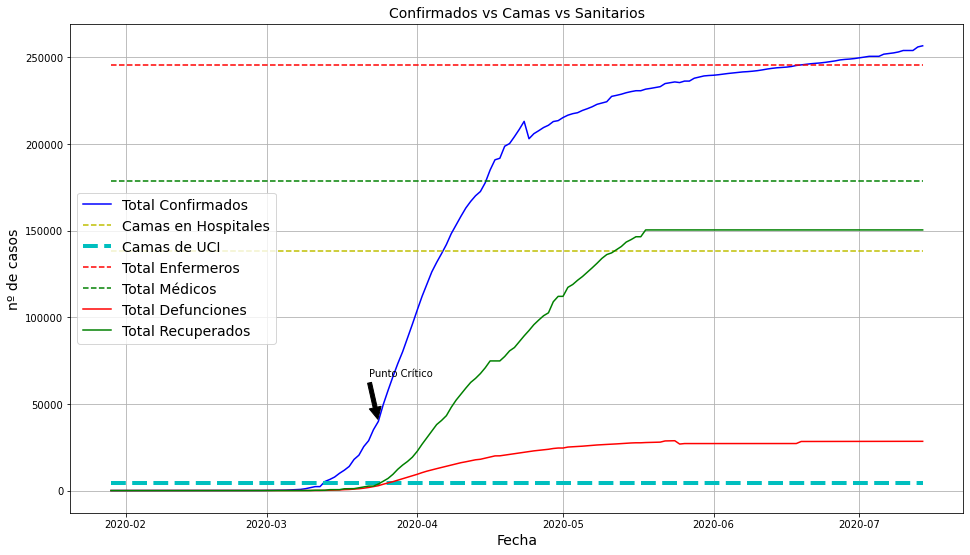

In [22]:
fig, ax=plt.subplots(figsize=(16,9))
ax.grid(True)
ax.plot(x,y,'b', label="Total Confirmados")
ax.plot(x,n_camas*Lista_one,'--y', label="Camas en Hospitales")
ax.plot(x,n_camas_uci*Lista_one,'--c', label="Camas de UCI",linewidth=4)
ax.plot(x,n_profecionales_enfermeria*Lista_one,'--r',label="Total Enfermeros")
ax.plot(x,n_profecionales_medicina*Lista_one,'--g',label="Total Médicos")
ax.plot(x,y1,'r', label="Total Defunciones")
ax.plot(x,y2,'-g',label="Total Recuperados")
ax.set_xlabel("Fecha").set_fontsize(14)
ax.set_ylabel("nº de casos").set_fontsize(14)
ax.set_title("Confirmados vs Camas vs Sanitarios").set_fontsize(14)
ax.legend(prop={"size":14})
plt.annotate('Punto Crítico', xy=(x[62], y[62]), xytext=(x[60], y[65]),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.show()

In [23]:
#DataFrame de las decisiones más relevantes en la primera ola
Dic_Desiciones_España=pd.DataFrame({
    "Fecha":["14-03-2020","29-03-2020","21-04-2020","23-05-2020","26-05-2020","21-06-2020","07-07-2020"],
    "Siglas_Desición":["EA","CTNE","SMC","CTF","IDes","NN","EV_SpC"],
    "Significado":["Estado Alarma","Confinamiento Trabajadores No Esenciales",
    "Salida de menores de 14","Cierre Total Frontera","Inicio Desescalada",
    "Nueva Normalidad","Entrada de viajeros sin posibilidad de cuarentena"]
})

In [24]:
#Transformar la fecha en formato fecha
Dic_Desiciones_España["Fecha"]=pd.to_datetime(Dic_Desiciones_España["Fecha"])

In [25]:
Dic_Desiciones_España.dtypes

Fecha              datetime64[ns]
Siglas_Desición            object
Significado                object
dtype: object

In [26]:
num=np.ones(len(Dic_Desiciones_España["Fecha"]))

In [27]:
Dic_Desiciones_España

,Fecha,Siglas_Desición,Significado
0,2020-03-14,EA,Estado Alarma
1,2020-03-29,CTNE,Confinamiento Trabajadores No Esenciales
2,2020-04-21,SMC,Salida de menores de 14
3,2020-05-23,CTF,Cierre Total Frontera
4,2020-05-26,IDes,Inicio Desescalada
5,2020-06-21,NN,Nueva Normalidad
6,2020-07-07,EV_SpC,Entrada de viajeros sin posibilidad de cuarentena


In [28]:
#En el dataset, se dispone de los datos acumulados
#Se pretende obtener los casos diarios casos_diarios=casos_acumulados_dia_actual-casos_acumulados_dia_anterior
diarios=[]
x=Spain_Data["Fecha"][7:175]
y=Spain_Data["Total Confirmados"][7:175]
n=len(x)
lista_y=y.tolist()
for i in range(n):
    resta=lista_y[n-1]-lista_y[n-2]
    diarios.append(resta)
    n=n-1
len(diarios)

168

In [29]:
#Se dispone de los valores ordenados inversamente se procede a ordenarlos 
diarios.reverse()
for n, i in enumerate(diarios):
    if i<0:
        diarios[n]=0

In [30]:
round(np.mean(diarios),2)

1589.43

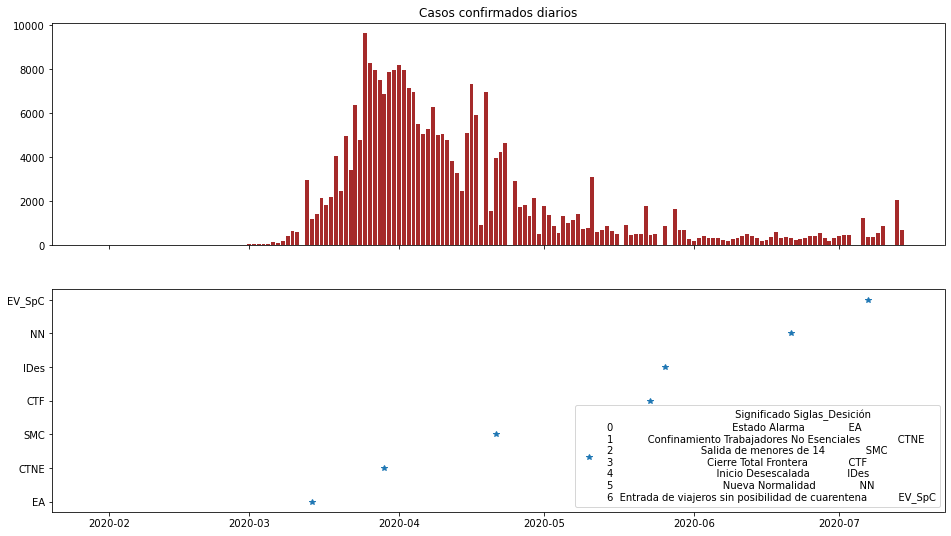

In [31]:
xd=Dic_Desiciones_España["Fecha"]
yd=Dic_Desiciones_España["Siglas_Desición"]
x=Spain_Data["Fecha"][7:175]
y=diarios
c=Dic_Desiciones_España[["Significado","Siglas_Desición"]]
fig, (ax1,ax2)=plt.subplots(2,1,sharex=True, figsize=(16,9))
ax1.bar(x, y,color='brown')
ax1.set_title("Casos confirmados diarios")
ax2.plot(xd, yd,'*', label=c)
plt.legend(loc='lower right')
plt.show()

### Evolución de la incidencia acumulada

In [32]:
#Función que calcula las incidencias acumuladas con periodo 7 días (por cada 100.000 habitantes)
C_data=diarios
poblacion=46440099
n=len(C_data)
factor=100000
#Valor inicial
L_IA=[]
dias=pd.Series(range(0,n))
i=0
j=7
   
while j<(n):
    Casos=round((sum(C_data[i:j])/poblacion)*factor,2)
    L_IA.append(Casos)
    i=i+1
    j=j+1
        
    DF_IA=L_IA
    
len(DF_IA)

161

In [33]:
x=Spain_Data["Fecha"][14:175]
y=DF_IA
len(x),len(y)

(161, 161)

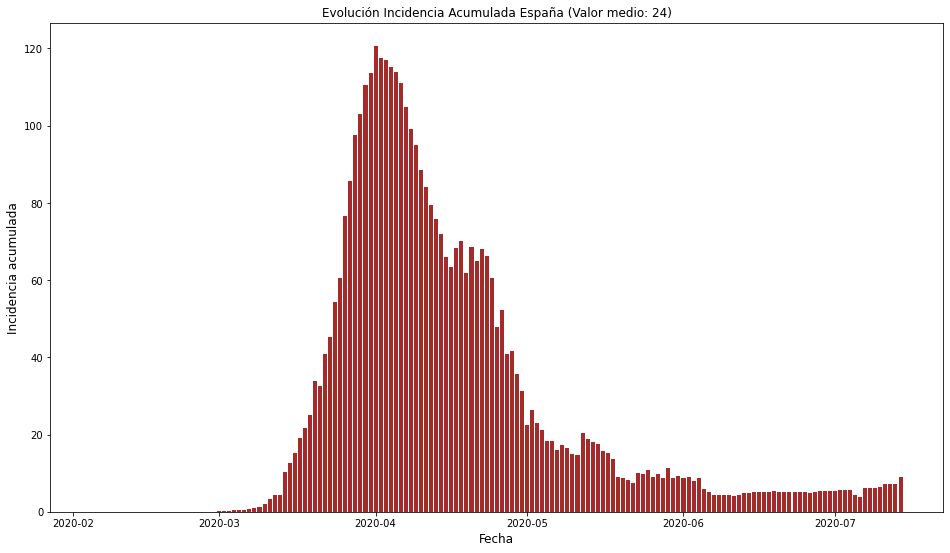

In [34]:
x=Spain_Data["Fecha"][14:175]
y=DF_IA
len(x)
len(y)
fig, ax=plt.subplots(figsize=(16,9))  
ax.bar(x,y,color='brown')
ax.set_title("Evolución Incidencia Acumulada España (Valor medio: {})".format(int(np.mean(y))))
ax.set_ylabel('Incidencia acumulada', fontsize=12)    
ax.set_xlabel('Fecha', fontsize=12)    
plt.show()

# Comparación entre los diferentes paises

* Se procede a comparar los datos de evolución de la pandemia entre España, Italia, Portugal, y Alemania

In [35]:
### Recursos sanitarios paises
#Nº de camas, nº camas de Uci, nº_profecionales_enfermería, nº_profecionales_medicina 
#[Spain; Italy; Germany; Portugal]
#DataFrames de recursos
Dic_Resourses_Country=pd.DataFrame({
    "n_camas": [138368,194065,664364,34890],
    "n_camas_uci": [4591,5217,32870,434],
    "n_prof_enf": [245533,330602,1033000,65135],
    "n_prof_med": [178600,233102,338129,47792],
    "n_habit":[46440099,60665551,82175684,10341330],
    "N_habit_M_65_años": [8992696,13346421,17256894,2171679],
    "N_habit_En_15_65_años":[31237787,38825953,54235951,6721864],
    "N_habit_Men_15_años":[7099497, 8493177,10682839,1447786],
    "Edad_Media": [43,46,46,44],
    "Esp_de_vida": [83, 83, 81, 81],
    "N_vacunas_gripe_M_65_años": [5035909,7407264,6574877,1105385],
    "Densidad_población_(hab/km2)":[94,200,233,112]
},index=["Spain", "Italy", "Germany", "Portugal"])

* Se quiere representar variables que no están expresadas de la forma requerida en la tabla, por lo tanto, se precede a realizar los cambios necesarios

In [36]:
#Añadir nueva columna, camas por cada 100.000 habitantes
Dic_Resourses_Country['n_camas_ch']=round((Dic_Resourses_Country['n_camas']/Dic_Resourses_Country['n_habit'])*100000,2)

In [37]:
#Añadir nueva columna, camas UCI por cada 100.000 habitantes
Dic_Resourses_Country['n_camas_UCI_ch']=round((Dic_Resourses_Country['n_camas_uci']/Dic_Resourses_Country['n_habit'])*100000,2)

In [38]:
#Añadir nueva columna, numero de enfermer@s por cada 100.000 habitantes
Dic_Resourses_Country['n_prof_enf_ch']=round((Dic_Resourses_Country['n_prof_enf']/Dic_Resourses_Country['n_habit'])*100000,2)

In [39]:
#Añadir nueva columna, numero de medicos por cada 100.000 habitantes
Dic_Resourses_Country['n_prof_med_ch']=round((Dic_Resourses_Country['n_prof_med']/Dic_Resourses_Country['n_habit'])*100000,2)

In [40]:
#Añadir nueva columna, porcentaje de población con 65 años o más
Dic_Resourses_Country['P_N_habit_M_65_años']=round((Dic_Resourses_Country['N_habit_M_65_años']/(Dic_Resourses_Country['n_habit']))*100,2)

In [41]:
#Añadir nueva columna, porcentaje de población con edades entre 15 y 65 años
Dic_Resourses_Country['P_N_habit_En_15_65_años']=round((Dic_Resourses_Country['N_habit_En_15_65_años']/(Dic_Resourses_Country['n_habit']))*100,2)

In [42]:
#Añadir nueva columna, porcentaje de población con menos de 15 años
Dic_Resourses_Country['P_N_habit_Men_15_años']=round((Dic_Resourses_Country['N_habit_Men_15_años']/(Dic_Resourses_Country['n_habit']))*100,2)

In [43]:
#Añadir nueva columna, porcentaje de población con 65 años o más vacunada
Dic_Resourses_Country['P_N_vacunas_gripe_M_65_años']=round((Dic_Resourses_Country['N_vacunas_gripe_M_65_años']/(Dic_Resourses_Country['n_habit']))*100,2)

In [44]:
#Añadir nueva columna, porcentaje densidad de población
Dic_Resourses_Country['P_Densidad_población_(hab/km2)']=round((Dic_Resourses_Country['Densidad_población_(hab/km2)']/(Dic_Resourses_Country['Densidad_población_(hab/km2)'].sum()))*100,2)

In [45]:
Dic_Resourses_Country

,n_camas,n_camas_uci,n_prof_enf,n_prof_med,n_habit,N_habit_M_65_años,N_habit_En_15_65_años,N_habit_Men_15_años,Edad_Media,Esp_de_vida,...,Densidad_población_(hab/km2),n_camas_ch,n_camas_UCI_ch,n_prof_enf_ch,n_prof_med_ch,P_N_habit_M_65_años,P_N_habit_En_15_65_años,P_N_habit_Men_15_años,P_N_vacunas_gripe_M_65_años,P_Densidad_población_(hab/km2)
Spain,138368,4591,245533,178600,46440099,8992696,31237787,7099497,43,83,...,94,297.95,9.89,528.71,384.58,19.36,67.26,15.29,10.84,14.71
Italy,194065,5217,330602,233102,60665551,13346421,38825953,8493177,46,83,...,200,319.89,8.60,544.96,384.24,22.00,64.00,14.00,12.21,31.30
Germany,664364,32870,1033000,338129,82175684,17256894,54235951,10682839,46,81,...,233,808.47,40.00,1257.06,411.47,21.00,66.00,13.00,8.00,36.46
Portugal,34890,434,65135,47792,10341330,2171679,6721864,1447786,44,81,...,112,337.38,4.20,629.85,462.15,21.00,65.00,14.00,10.69,17.53


In [46]:
#Obtención de un DataFrame, que contenga los valores de casos diarios informados para los diferentes paises
#ya que los valores de los que se disponen son los datos de acumulados
def evolucion_datos_diarios(casos="Total Confirmados"):
    Paises=["Spain", "Italy", "Germany", "Portugal"]
    m=0
    for p in Paises:
        ##Obtención de los datos
        #Datos casos confirmados acumulados 
        data_confirmed=pd.read_csv(path1)
        Data_Confirmed_Country=data_confirmed[data_confirmed["Country/Region"]==p]
        #Datos defunciones acumuladas 
        data_deaths=pd.read_csv(path2)
        Data_Deaths_Country=data_deaths[data_deaths["Country/Region"]==p]
        #Datos recuperados acumulados 
        data_recovered=pd.read_csv(path3)
        Data_Recovered_Country=data_recovered[data_recovered["Country/Region"]==p]

        ##Obtención de los valores en una lista, para así crear un DataFrame con los datos para cada País
        #Lista con valores de fecha (comenzando desde la cuarta fila)
        date_value_list=data_confirmed.columns.values.tolist()
        date_value=date_value_list[4:]
        #Lista de confirmados
        confirmed_value=Data_Confirmed_Country.iloc[0,4:].tolist()
        #Lista de defunciones
        deaths_value=Data_Deaths_Country.iloc[0,4:].tolist()
        #Lista de Recuperados
        recovered_value=Data_Recovered_Country.iloc[0,4:].tolist()

        DataFrame_Country_Data=pd.DataFrame({
            "Fecha":date_value,
            "Total Confirmados":confirmed_value,
            "Total Defunciones":deaths_value,
            "Total Recuperados":recovered_value
            })

        #Cambio de formato de la fecha
        DataFrame_Country_Data["Fecha"]=pd.to_datetime(DataFrame_Country_Data["Fecha"])

        #En el dataset, se dispone de los datos acumulados
        #Se pretende obtener los casos diarios casos_diarios=casos_acumulados_dia_actual-casos_acumulados_dia_anterior
        diarios=[]
        x=DataFrame_Country_Data["Fecha"][7:175]
        y=DataFrame_Country_Data[casos][7:175]
        n=len(x)
        lista_y=y.tolist()
        for i in range(n):
            resta=lista_y[n-1]-lista_y[n-2]
            diarios.append(resta)
            n=n-1

        #Se dispone de los valores ordenados inversamente, se procede a ordenarlos
        #Si alguno de los valores es negativo.Darle valor 0
        diarios.reverse()
        for n, i in enumerate(diarios):
            if i<0:
                diarios[n]=0

        if m==0:
            DF_diarios=pd.DataFrame({p:diarios,
                                })
            m=m+1

        else:

            #Concatena dicho dataFrame con el de datos_nuevos
            df=pd.DataFrame({p:diarios,
                            })
            frames=[DF_diarios,df]
            DF_diarios=pd.concat(frames,axis=1)
    return [DF_diarios,DataFrame_Country_Data]

In [47]:
DF_diarios=evolucion_datos_diarios()[0]
DF_diarios[30:50]

,Spain,Italy,Germany,Portugal
30,17,233,2,0
31,13,240,31,0
32,39,566,51,0
33,36,342,29,2
34,45,466,37,0
35,57,587,66,3
36,37,769,220,3
37,141,778,188,5
38,100,1247,129,7
39,173,1492,241,10


In [48]:
DF_diarios.shape

(168, 4)

In [49]:
Dic_color={
    'Spain':'Red',
    'Italy':'Blue',
    'Germany':'Black',
    'Portugal':'limegreen'
    }

In [50]:
def visualizacion_casos_diarios(Tanalisis='Confirmados'):
    Paises=["Spain", "Italy", "Germany", "Portugal"]
    color=['Red','Blue','Black','Green']
    if Tanalisis=='Confirmados': 
        #Visualización casos diarios paises    
        x=evolucion_datos_diarios()[1]["Fecha"][7:175]
        y=DF_diarios[Paises[0]]
        y1=DF_diarios[Paises[1]] 
        y2=DF_diarios[Paises[2]]
        y3=DF_diarios[Paises[3]] 
        l='nº Casos'
    elif Tanalisis=='Defunciones':
        x=evolucion_datos_diarios("Total Defunciones")[1]["Fecha"][7:175]
        y=DF_diarios_defunciones[Paises[0]]
        y1=DF_diarios_defunciones[Paises[1]] 
        y2=DF_diarios_defunciones[Paises[2]]
        y3=DF_diarios_defunciones[Paises[3]]
        l='nº defunciones'
        
    fig, axs=plt.subplots(2,2,constrained_layout=False,figsize=(16,9))  
    axs[0][0].bar(x,y,color=color[0])
    axs[0][0].set_title(str(Paises[0]) +"({})".format(int(y.mean())))
    axs[0][0].set_ylabel(l, fontsize=12)

    axs[0][1].bar(x,y1,color=color[1])
    axs[0][1].set_title(str(Paises[1])  +"({})".format(int(y1.mean())))


    axs[1][0].bar(x,y2,color=color[2])
    axs[1][0].set_title(str(Paises[2]) +"({})".format(int(y2.mean())))
    axs[1][0].set_ylabel(l, fontsize=12)
    axs[1][0].set_xlabel('Fecha', fontsize=12)

    axs[1][1].bar(x,y3,color=color[3])
    axs[1][1].set_title(str(Paises[3])  +"({})".format(int(y3.mean())))
    axs[1][1].set_xlabel('Fecha', fontsize=12)
    plt.show()

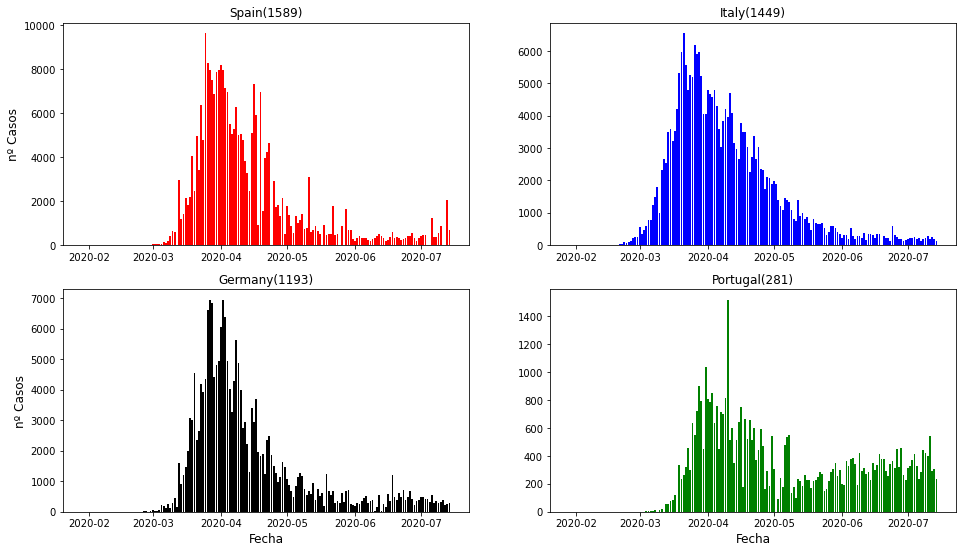

In [51]:
visualizacion_casos_diarios(Tanalisis='Confirmados')

In [52]:
#Cálculo de la incidencia acumulada
def Incidencia_acumulada(factor=100000,DF=DF_diarios):
    #Cálculo de la incidencia media acumulada
    Paises=['Spain', 'Italy', 'Germany', 'Portugal']
    factor=factor
    m=0
    for p in Paises:
        List_IA=[]

        poblacion=Dic_Resourses_Country['n_habit'][p]
        n=DF.shape[0]
        i=0
        j=7
        while j<n:
            IA=round((sum(DF[p][i:j])/poblacion)*factor,2)
            List_IA.append(IA)
            i=i+1
            j=j+1

        
        if m==0:
            
            DF_IA_Paises=pd.DataFrame({p:List_IA,
                                })
            m=m+1

        else:
            
            #Concatena dicho dataFrame con el de datos_nuevos
            df=pd.DataFrame({p:List_IA,
                            })
            frames=[DF_IA_Paises,df]
            DF_IA_Paises=pd.concat(frames,axis=1)
    return DF_IA_Paises

In [53]:
DF_IA_Paises=Incidencia_acumulada()
DF_IA_Paises.tail()

,Spain,Italy,Germany,Portugal
156,6.36,2.31,3.20,24.13
157,7.24,2.40,3.11,24.40
158,7.24,2.32,3.06,25.64
159,7.24,2.39,2.92,25.29
160,8.97,2.33,2.57,26.00


In [54]:
DF_IA_Paises.shape

(161, 4)

#### Evolución de los datos en base a la incidencia acumulada (periodo de 7 días)

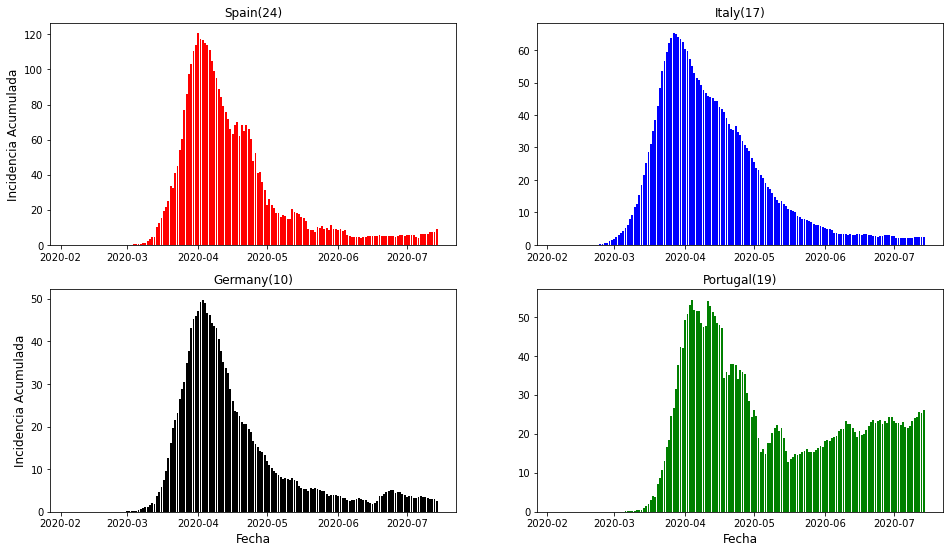

In [55]:
#Visualización casos diarios paises
Paises=["Spain", "Italy", "Germany", "Portugal"]
color=['Red','Blue','Black','Green']
x=evolucion_datos_diarios()[1]["Fecha"][14:175]
y=DF_IA_Paises[Paises[0]]
y1=DF_IA_Paises[Paises[1]] 
y2=DF_IA_Paises[Paises[2]]
y3=DF_IA_Paises[Paises[3]] 
    
fig, axs=plt.subplots(2,2,constrained_layout=False,figsize=(16,9))  
axs[0][0].bar(x,y,color=color[0])
axs[0][0].set_title(str(Paises[0]) +"({})".format(int(y.mean())))
axs[0][0].set_ylabel('Incidencia Acumulada', fontsize=12)
    
axs[0][1].bar(x,y1,color=color[1])
axs[0][1].set_title(str(Paises[1])  +"({})".format(int(y1.mean())))
    
    
axs[1][0].bar(x,y2,color=color[2])
axs[1][0].set_title(str(Paises[2]) +"({})".format(int(y2.mean())))
axs[1][0].set_ylabel('Incidencia Acumulada', fontsize=12)
axs[1][0].set_xlabel('Fecha', fontsize=12)
    
axs[1][1].bar(x,y3,color=color[3])
axs[1][1].set_title(str(Paises[3])  +"({})".format(int(y3.mean())))
axs[1][1].set_xlabel('Fecha', fontsize=12)
plt.show()

In [56]:
#Valor medio de incidencia acumulada vs valor máximo vs día en el que se alcanza el valor máximo
def analisisBasico(DF=DF_IA_Paises,Tanalisis='confirmados'):
    if Tanalisis=='confirmados':
        l='Incidencia acumulada'
        l1='Valor medio Incidencia acumulada'
        l2='Valor máximo registrado (IA)'
        l3='Máximo valor registrado de IA'
        l4='Día de registró del valor máximo (IA)'
        l5='Día de registro del valor máximo'
        DF=DF_IA_Paises
    elif Tanalisis=='Defunciones':
        l='Defunciones diarias'
        l1='Valor medio defunciones'
        l2='Valor máximo registrado de nº defunciones'
        l3='Máximo valor registrado defunciones diarias'
        l4='Dia de registro valor máximo'
        l5='Día de registro del valor máximo defunciones diarias'
        DF=DF_diarios_defunciones
    else:
        l=' '
        l1=' '
        l2=' '
        l3=' '
        l4=' '
        l5=' '
        
    fig, axs = plt.subplots(nrows=1, ncols=3,squeeze=False,constrained_layout=False,figsize=(16,9))
    fig.set_facecolor("#f1f7ec")
    color=['Red','Blue','Black','limegreen']
    j=0
    for i in ["Spain", "Italy", "Germany", "Portugal"]:
        y=DF[i]
        y_med=y.mean()
        y_max=y.max()
        y_dia_max=DF[i].argmax()
        axs[0][0].barh(i,y_med,0.35,color=color[j],edgecolor ='white',align='center')
        axs[0][0].set_title(l1,fontsize=16)
        axs[0][0].text(y_med, i, str(round(y_med,2)),fontsize=12)
        axs[0][0].set_xlabel(l, fontsize=12)
        axs[0][0].grid(True)

        axs[0][1].barh(i,y_max,0.35,color=color[j],edgecolor ='white',align='center')
        axs[0][1].set_title(l2,fontsize=16)
        axs[0][1].text(y_max, i, str(round(y_max,2)),fontsize=12)
        axs[0][1].set_xlabel(l3, fontsize=12)
        axs[0][1].grid(True)

        axs[0][2].barh(i,y_dia_max,0.35,color=color[j],edgecolor ='white',align='center')
        axs[0][2].set_title(l4,fontsize=16)
        axs[0][2].text(y_dia_max, i, str(round(y_dia_max,2)),fontsize=12)
        axs[0][2].set_xlabel(l5, fontsize=12)
        axs[0][2].grid(True)
        j=j+1
    fig.tight_layout()    
    return plt.show()

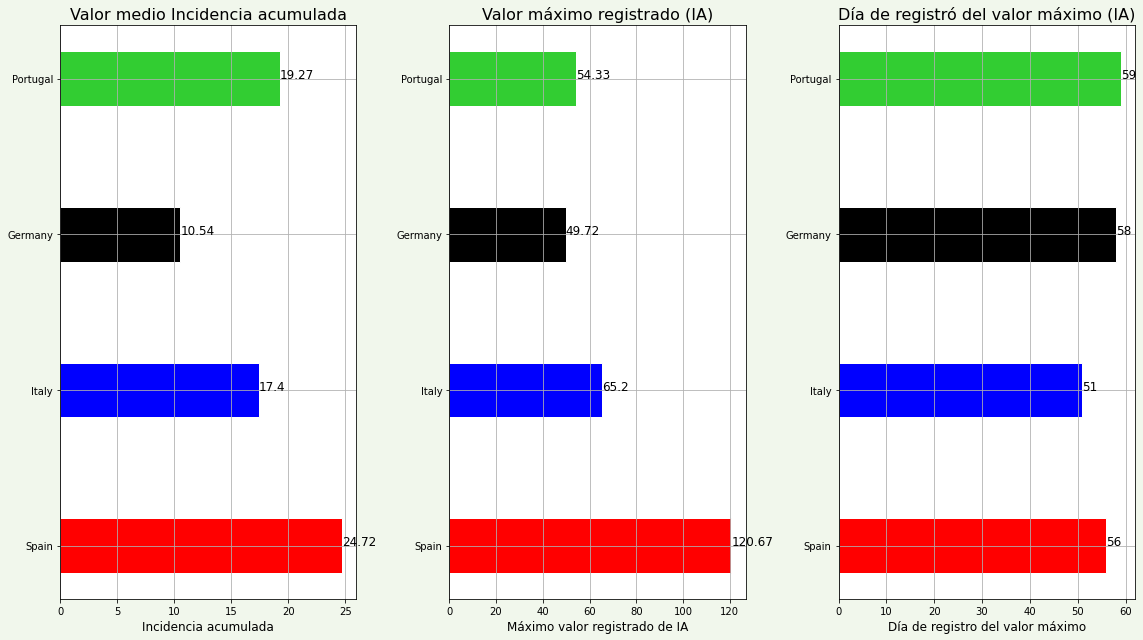

In [57]:
analisisBasico(Tanalisis='confirmados')

In [58]:
#Obtención de una lista con todos los valores.
#L_valor_medio
L_mean_IA=[]
#L_valor_máximo
L_max_IA=[]
#L_valor_nombre
L_nom_Paises=[]
#L_valor_densidad_de_población
L_den_pob=[]
#L_valor_edad_media_población
L_edadM_pob=[]
#L_valor_población_65_años_o_más
L_mayores65_pob=[]
#L_valor_población_de_15_65_años
L_entre15_65_pob=[]
#L_color_comunidades_autónomas
L_color=[]
#Vacunas_gripe_año anterior_mayores_de_65_años
L_vac_mayores65_pob=[]
#profecionales_enfermería_por_cada 100.000 habitantes
L_prof_enfer=[]
#profecionales_medicos_por_cada 100.000 habitantes
L_prof_med=[]
#número_camas_por_cada 100.000 habitantes
L_camas=[]
#número_camas_uci_por_cada 100.000 habitantes
L_camas_UCI=[]
for i in ["Spain", "Italy", "Germany", "Portugal"]:
    y=DF_IA_Paises[i]
    L_nom_Paises.append(i)
    L_max_IA.append(y.max())
    L_mean_IA.append(y.mean())
    L_color.append(Dic_color[i])
    L_den_pob.append(Dic_Resourses_Country['P_Densidad_población_(hab/km2)'][i])
    L_edadM_pob.append(Dic_Resourses_Country['Edad_Media'][i])
    L_mayores65_pob.append(Dic_Resourses_Country['P_N_habit_M_65_años'][i])
    L_entre15_65_pob.append(Dic_Resourses_Country['P_N_habit_En_15_65_años'][i])
    L_vac_mayores65_pob.append(Dic_Resourses_Country['P_N_vacunas_gripe_M_65_años'][i])
    L_prof_enfer.append(Dic_Resourses_Country['n_prof_enf_ch'][i])
    L_prof_med.append(Dic_Resourses_Country['n_prof_med_ch'][i])
    L_camas.append(Dic_Resourses_Country['n_camas_ch'][i])
    L_camas_UCI.append(Dic_Resourses_Country['n_camas_UCI_ch'][i])

#### Paises más afectados por la pandemia durante la primera ola

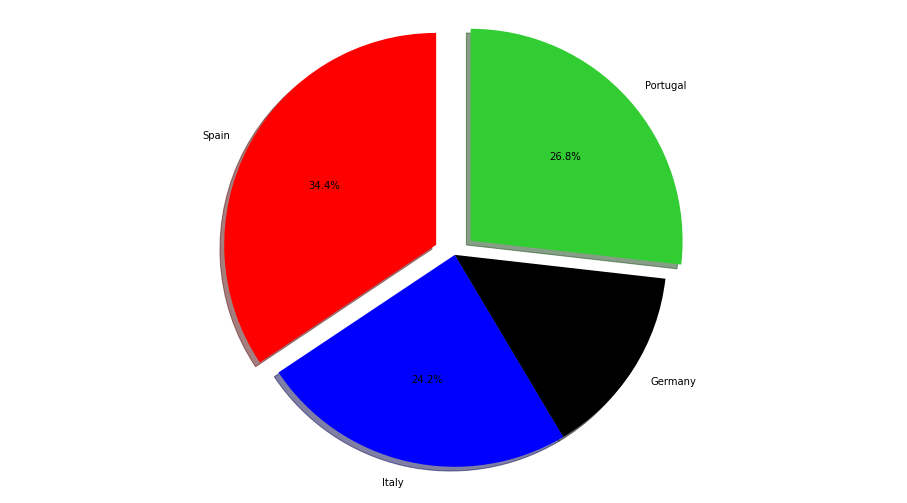

In [59]:
#Análisis de los paises más afectados por pandemia en función del peso del valor medio
labels = L_nom_Paises
sizes = L_mean_IA
colors=L_color
explode = (0.1, 0, 0, 0.1)
fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(sizes, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

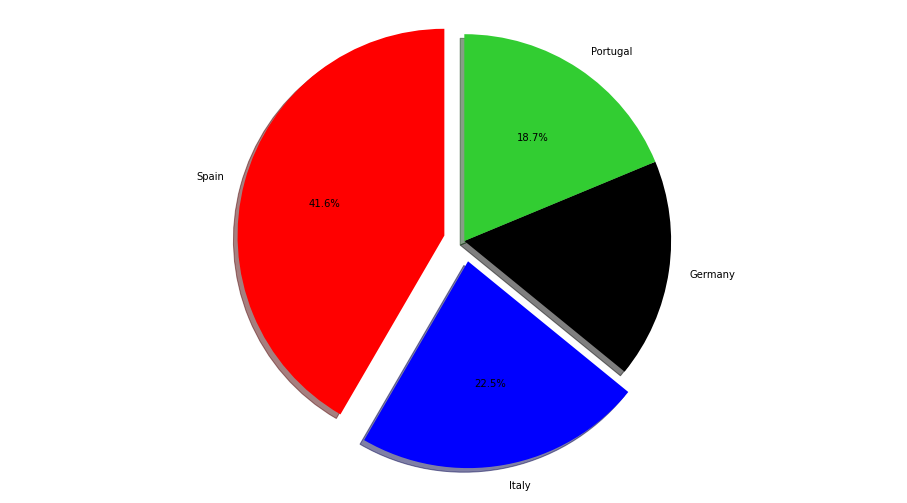

In [60]:
#Análisis de las comunidades más afectadas por pandemia en función del peso del valor máximo
labels = L_nom_Paises
sizes = L_max_IA
colors=L_color
explode = (0.1, 0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(sizes, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [61]:
#Función para realizar las visualizaciones (comparaciones)
#Gráfico de baras acumuladas
def bar_comparacion(y1,y2,l1="Incidencia Acumulada media",l2='',Tanalisis='confirmados'):
    if Tanalisis=='confirmados':
        c='orange'
    elif Tanalisis=='defunciones':
        c='red'
    else:
        c='lime'
        
    x=L_nom_Paises
    y1=y1
    y2=y2
    fig,ax=plt.subplots(figsize=(16,9))
    ax.bar(x,y1,0.35,color=c,bottom=y2,label=l1)
    ax.bar(x,y2,0.35,color='blue',label=l2)
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=90)
    plt.show()

In [62]:
#Función para realizar las visualizaciones (comparaciones)
#Gráfico bidimencional
def graf_bidimencional(x,y2,tx="",ty="Incidencia Acumulada media",tamaño_scatter_p=200):
    #L_mean_IA
    #L_den_pob
    x=x
    y2=y2
    label=L_nom_Paises
    size=np.ones(4)*tamaño_scatter_p
    j=0
    fig,ax=plt.subplots(figsize=(16,9))
    for i in ["Spain", "Italy", "Germany", "Portugal"]:
        scatter=ax.scatter(x[j],y2[j],color=Dic_color[i],label=label[j],s=size[j])  
        ax.set_ylabel(ty, fontsize=16)
        ax.set_xlabel(tx, fontsize=16)
        plt.xticks(rotation=90)
        j=j+1
        ax.grid(True)
    ax.legend(title="--Paises--")
    fig.tight_layout()
    plt.show()

In [63]:
Dic_Resourses_Country['Densidad_población_(hab/km2)'][["Spain", "Italy", "Germany", "Portugal"]]

Spain        94
Italy       200
Germany     233
Portugal    112
Name: Densidad_población_(hab/km2), dtype: int64

#### Efecto de la densidad en la incidencia acumulada

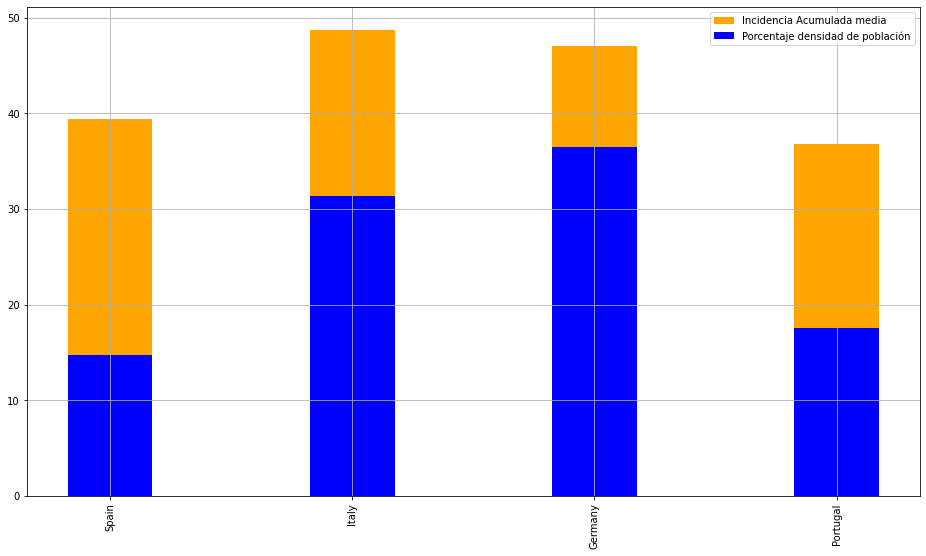

In [64]:
bar_comparacion(L_mean_IA,L_den_pob,"Incidencia Acumulada media","Porcentaje densidad de población")

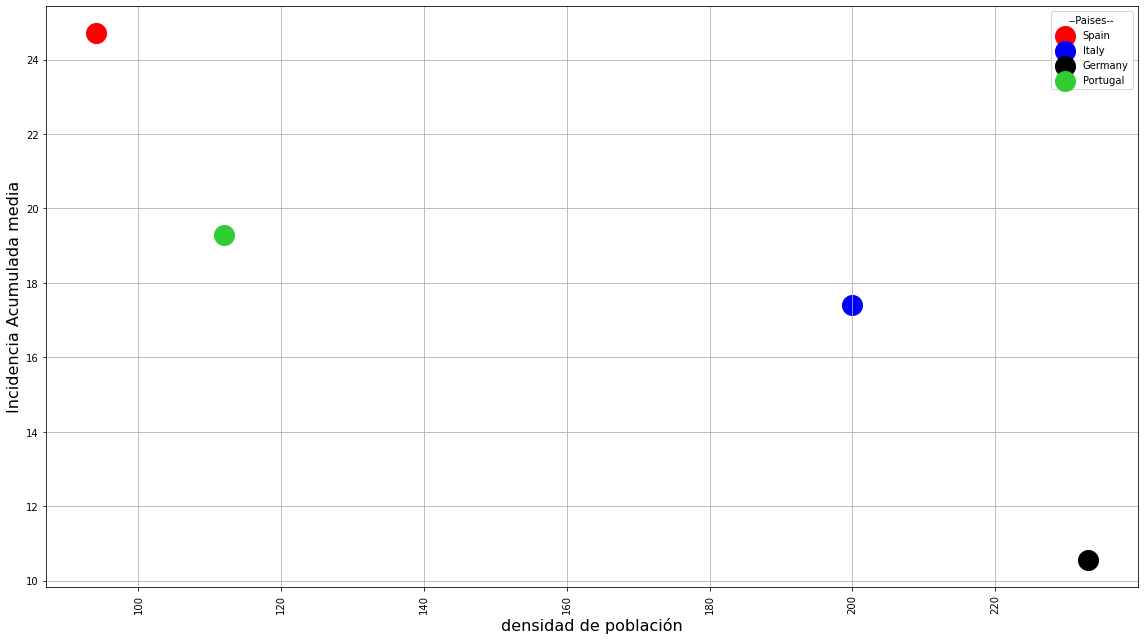

In [65]:
graf_bidimencional(Dic_Resourses_Country['Densidad_población_(hab/km2)'][["Spain", "Italy", "Germany", "Portugal"]],
                   L_mean_IA,"densidad de población","Incidencia Acumulada media",400)

#### Efecto de la edad media en la incidencia acumulada media

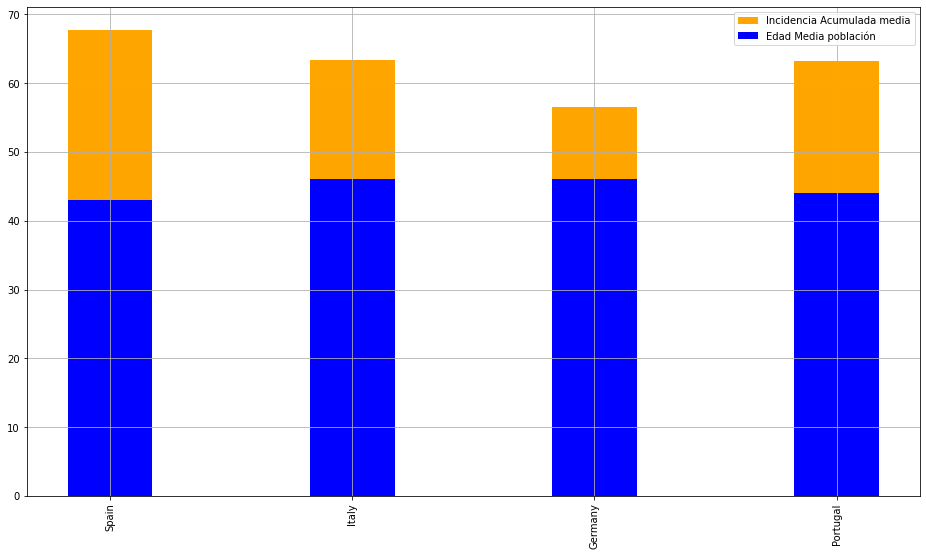

In [66]:
bar_comparacion(L_mean_IA,L_edadM_pob,"Incidencia Acumulada media","Edad Media población")

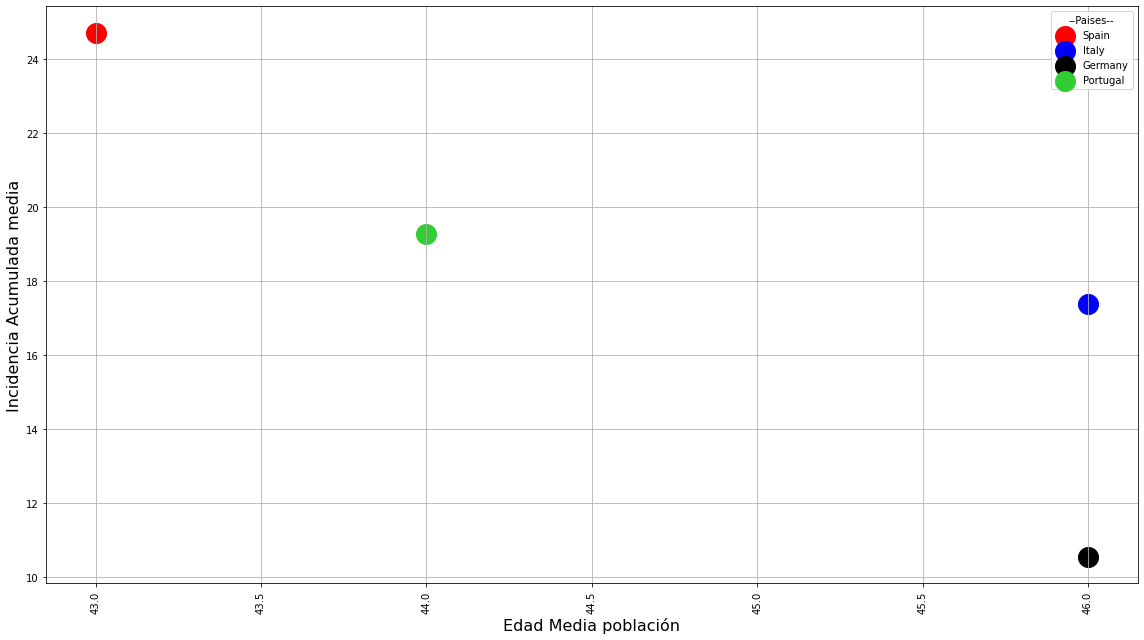

In [67]:
graf_bidimencional(L_edadM_pob,L_mean_IA,"Edad Media población","Incidencia Acumulada media",400)

#### Influencia de la población con 65 años o más

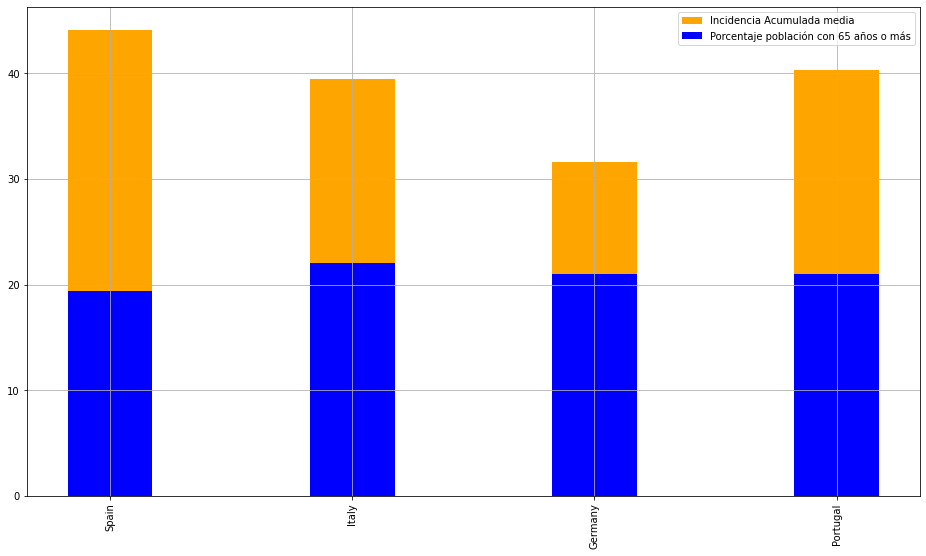

In [68]:
bar_comparacion(L_mean_IA,L_mayores65_pob,"Incidencia Acumulada media","Porcentaje población con 65 años o más")

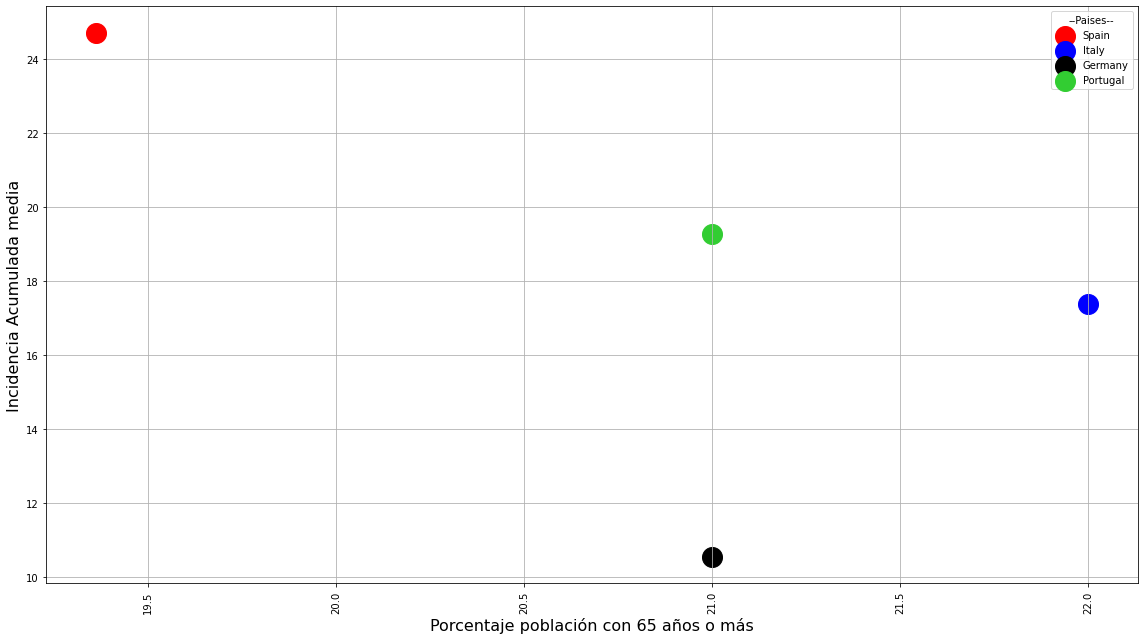

In [69]:
graf_bidimencional(L_mayores65_pob,L_mean_IA,"Porcentaje población con 65 años o más","Incidencia Acumulada media",400)

#### Efecto de la población con edades comprendidas entre 15 y 65 años

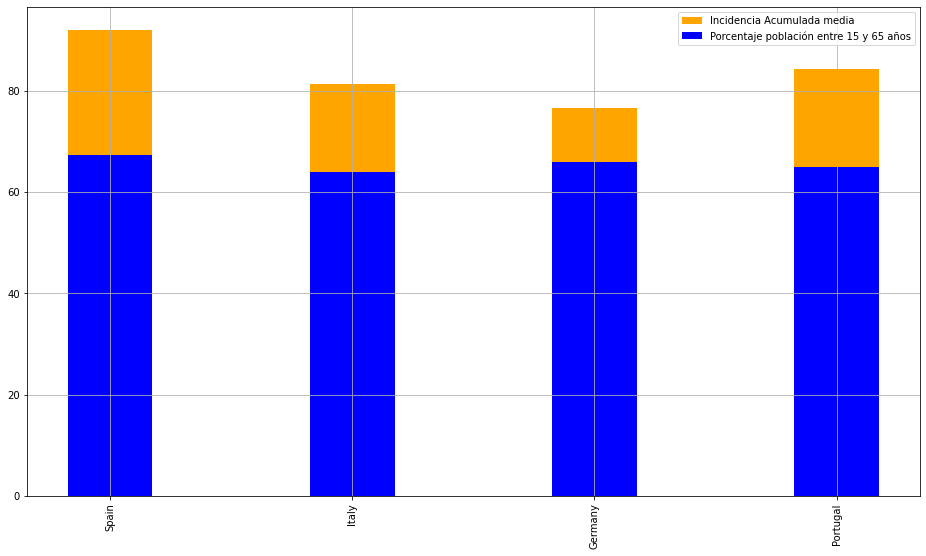

In [70]:
bar_comparacion(L_mean_IA,L_entre15_65_pob,"Incidencia Acumulada media","Porcentaje población entre 15 y 65 años")

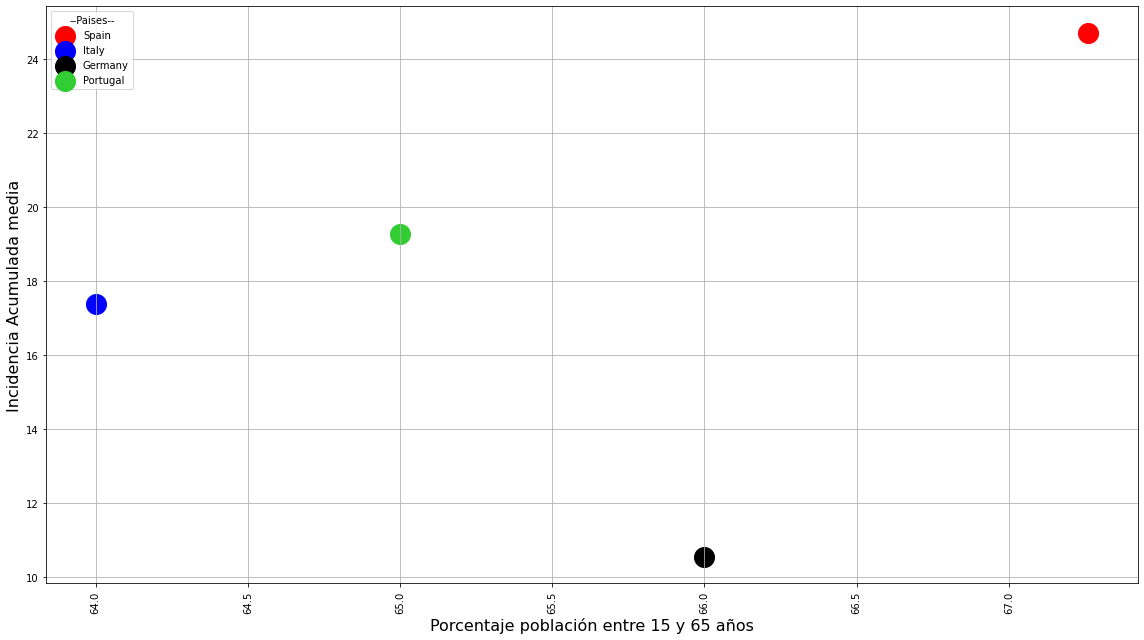

In [71]:
graf_bidimencional(L_entre15_65_pob,L_mean_IA,"Porcentaje población entre 15 y 65 años","Incidencia Acumulada media",400)

#### Efecto del porcentaje de población con 65 años o más vacunada

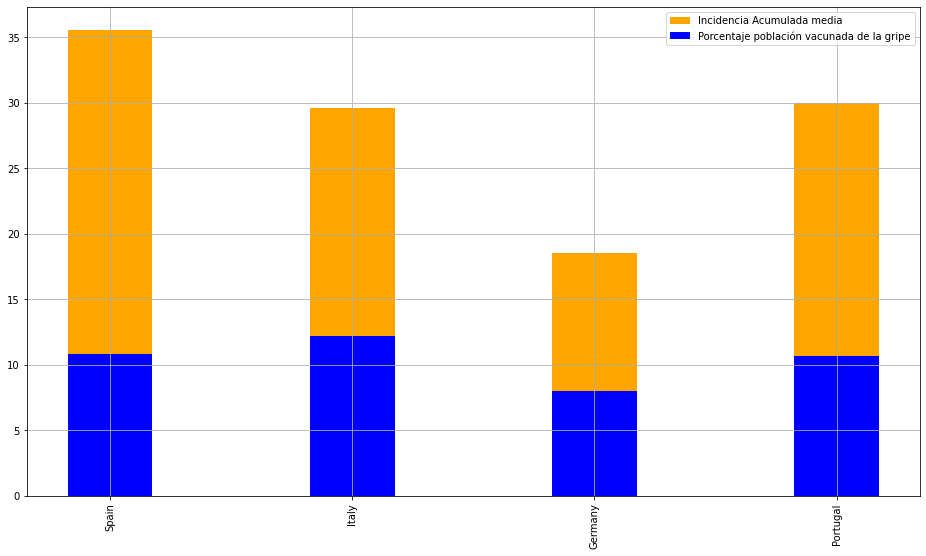

In [72]:
bar_comparacion(L_mean_IA,L_vac_mayores65_pob,"Incidencia Acumulada media","Porcentaje población vacunada de la gripe")

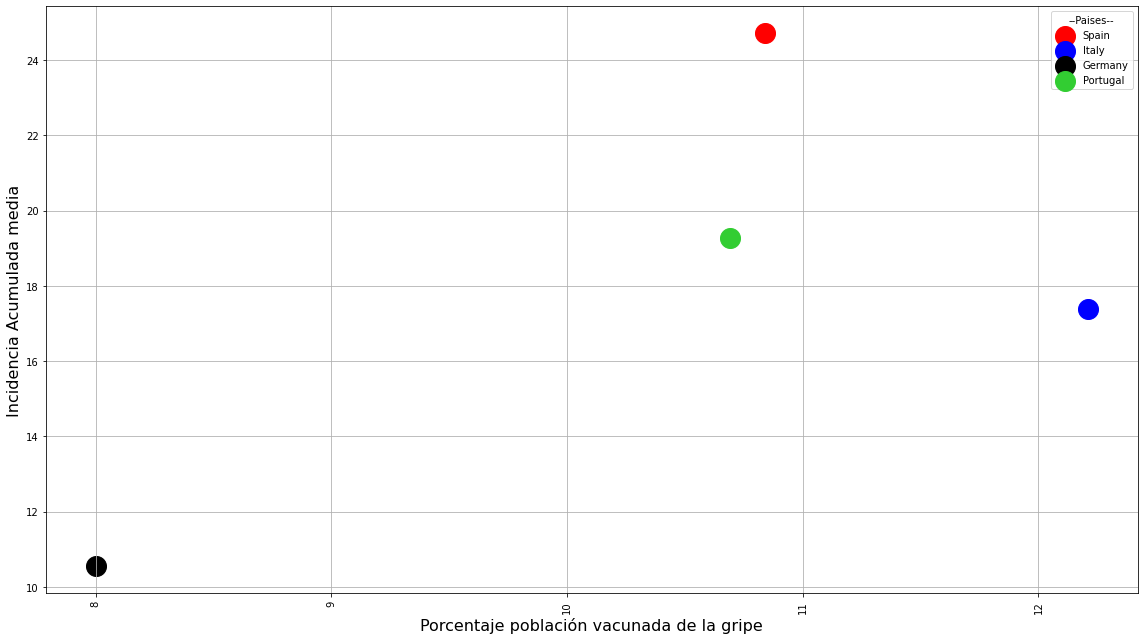

In [73]:
graf_bidimencional(L_vac_mayores65_pob,L_mean_IA,"Porcentaje población vacunada de la gripe","Incidencia Acumulada media",400)

#### Efecto conjunto población de entre densidad de población, población con 65 años o más

In [74]:
def bar_comparacion_2(y1,y2,y3,L1=' ',L2=' ',L3='Incidencia Acumulada media',Tanalisis='confirmados'):
    if Tanalisis=='confirmados':
        c='orange'
    elif Tanalisis=='defunciones':
        c='red'
    else:
        c='lime'
        
    x=L_nom_Paises
    y1=y1
    y2=y2
    y3=y3
    bottom_i=list(np.add(y1,y2))
    fig,ax=plt.subplots(figsize=(16,9))
    ax.bar(x,y1,0.35,color='blue',label=L1)
    ax.bar(x,y2,0.35,bottom=y1,color='green',label=L2)
    ax.bar(x,y3,0.35,bottom=bottom_i,color=c,label=L3)
    ax.grid(True)
    ax.legend()
    plt.xticks(rotation=90)
    plt.show()

#### Efecto de la densidad de población, y la población con 65 años o más en la IA acumulada

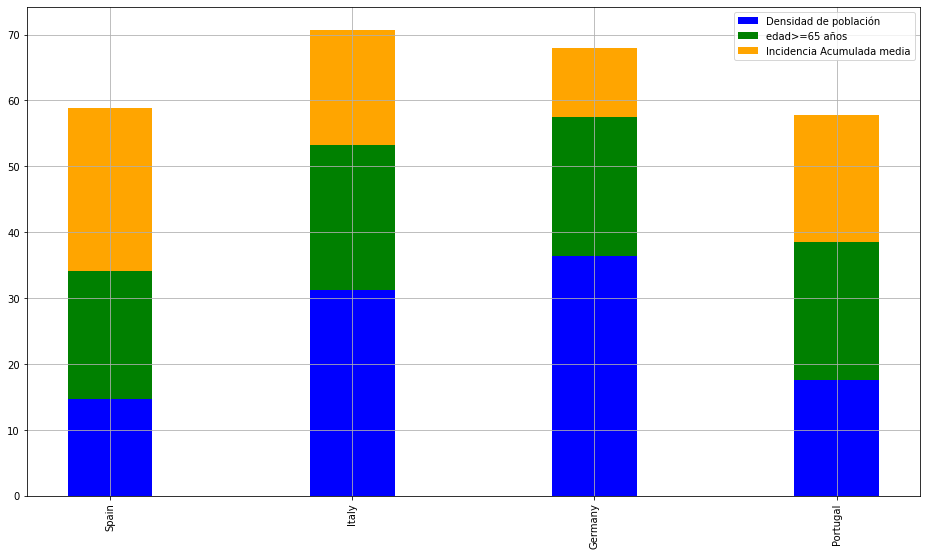

In [75]:
bar_comparacion_2(L_den_pob,L_mayores65_pob,L_mean_IA,'Densidad de población','edad>=65 años',"Incidencia Acumulada media")

#### Influencia de la población con edad entre 15 y 65 años, y el porcentaje de población vacunada sobre la IA

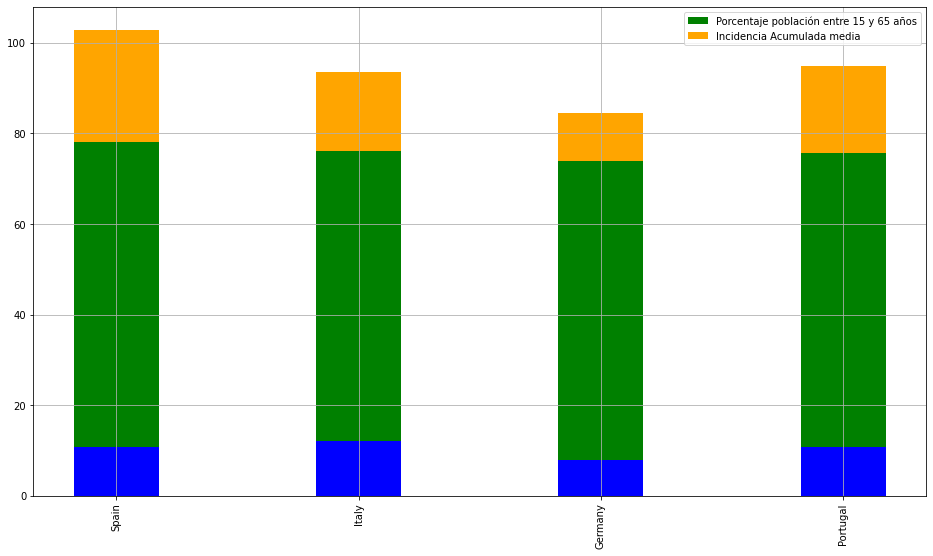

In [76]:
bar_comparacion_2(L_vac_mayores65_pob,L_entre15_65_pob,L_mean_IA,"","Porcentaje población entre 15 y 65 años","Incidencia Acumulada media")

### Análisis parecido, utilizando la incidencia acumulada en defunciones

* Se procede a analizar el efecto de alguna de las variables con el número de muertes diarias

In [77]:
DF_diarios_defunciones=evolucion_datos_diarios("Total Defunciones")[0]
DF_diarios_defunciones[30:50]

,Spain,Italy,Germany,Portugal
30,0,4,0,0
31,0,8,0,0
32,0,5,0,0
33,0,18,0,0
34,1,27,0,0
35,1,28,0,0
36,1,41,0,0
37,2,49,0,0
38,5,36,0,0
39,7,133,0,0


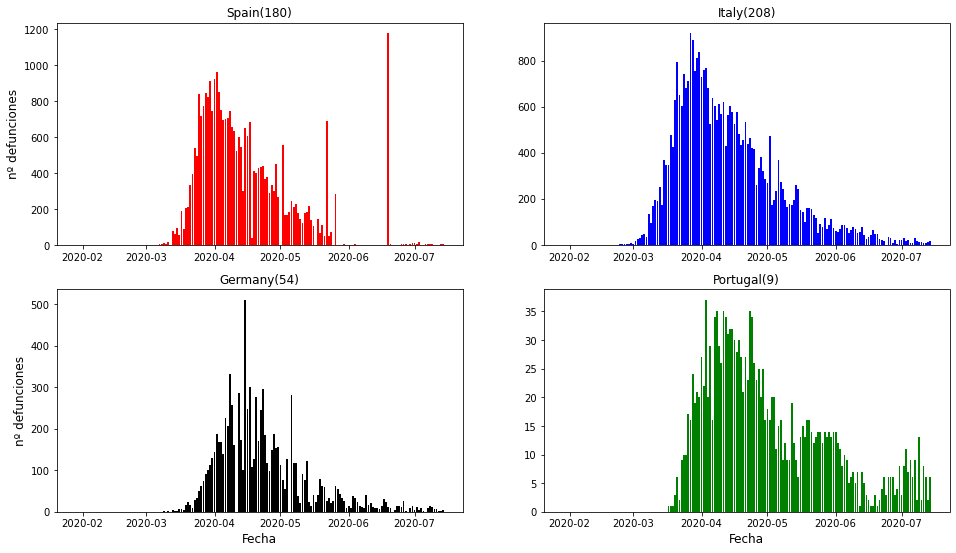

In [78]:
#Visualización defunciones diarias paises
visualizacion_casos_diarios(Tanalisis='Defunciones')

* Debido a que ne españa se realizo un ajuste del número de defunciones, existe un valor que sobresale del resto es necesario corregirlo


In [79]:
L=DF_diarios_defunciones[DF_diarios_defunciones["Spain"]==1179]
DF_diarios_defunciones["Spain"][142]=1179/168

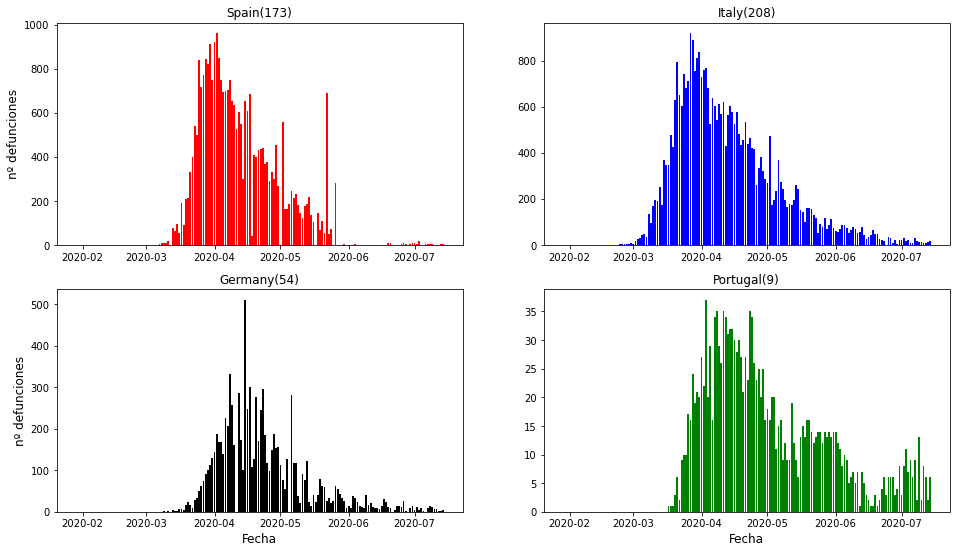

In [80]:
visualizacion_casos_diarios(Tanalisis='Defunciones')

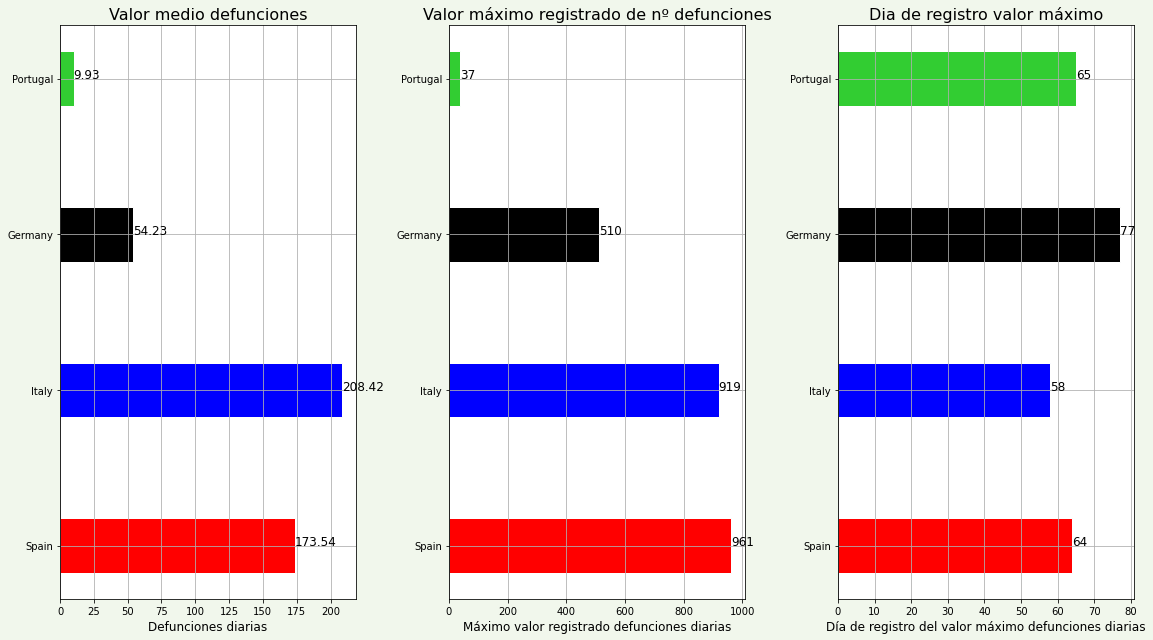

In [81]:
analisisBasico(Tanalisis='Defunciones')

In [82]:
DF_diarios_defunciones.shape

(168, 4)

In [83]:
L_mean_NA_F=DF_diarios_defunciones[["Spain", "Italy", "Germany", "Portugal"]].max().tolist()

#### Efecto del número de enfermer@s en la incidencia acumulada en defunciones

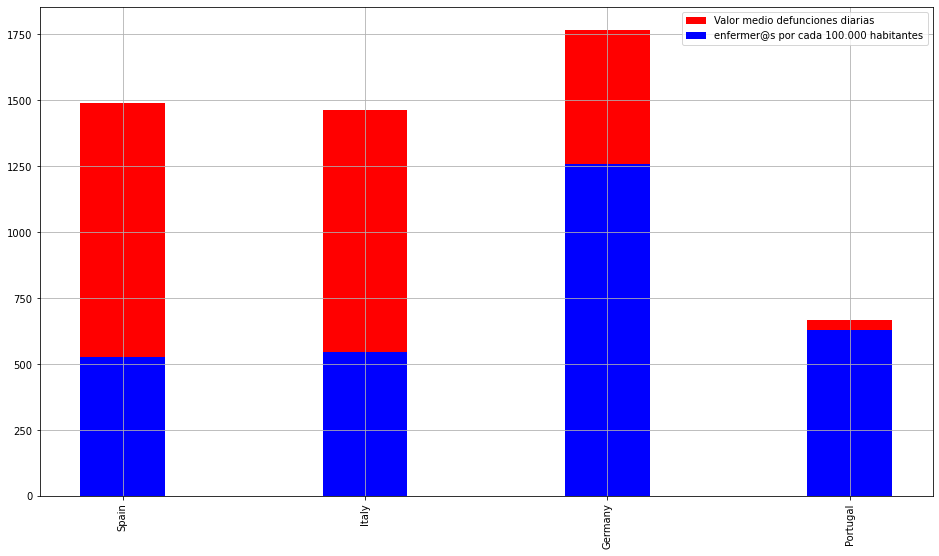

In [84]:
bar_comparacion(L_mean_NA_F,L_prof_enfer,"Valor medio defunciones diarias","enfermer@s por cada 100.000 habitantes",'defunciones')

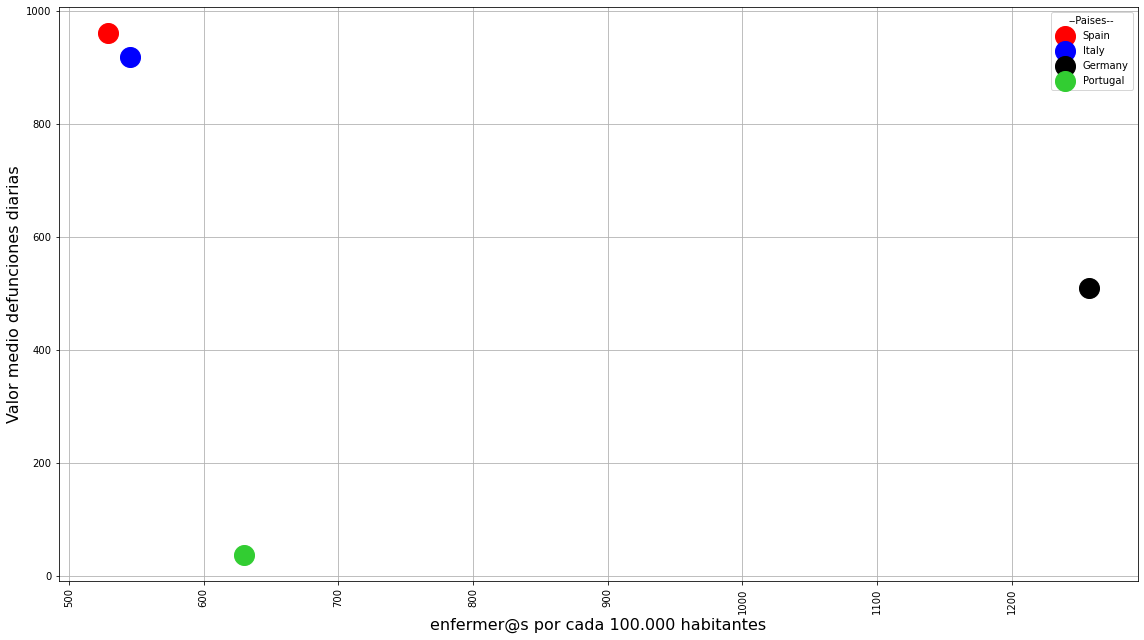

In [85]:
graf_bidimencional(L_prof_enfer,L_mean_NA_F,"enfermer@s por cada 100.000 habitantes",
                   "Valor medio defunciones diarias",400)


#### Efecto de la influencia del nº de médicos (H/M) en la incidencia acumulada en defunciones

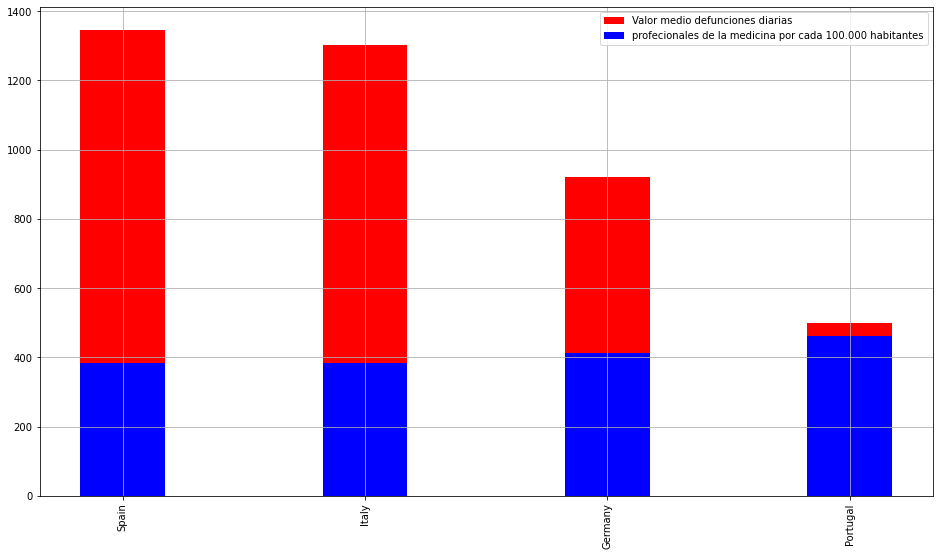

In [86]:
bar_comparacion(L_mean_NA_F,L_prof_med,"Valor medio defunciones diarias","profecionales de la medicina por cada 100.000 habitantes",'defunciones')

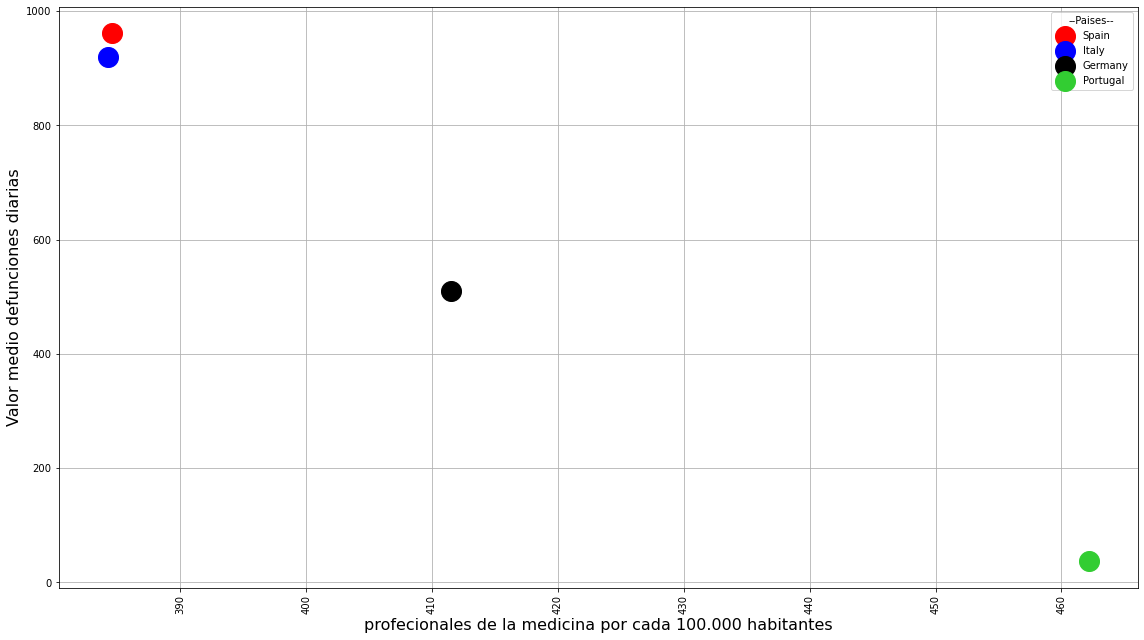

In [87]:
graf_bidimencional(L_prof_med,L_mean_NA_F,"profecionales de la medicina por cada 100.000 habitantes",
                   "Valor medio defunciones diarias",400)

#### Influencia de la población entre 15 y 65 años en la incidencia acumulada en defunciones 

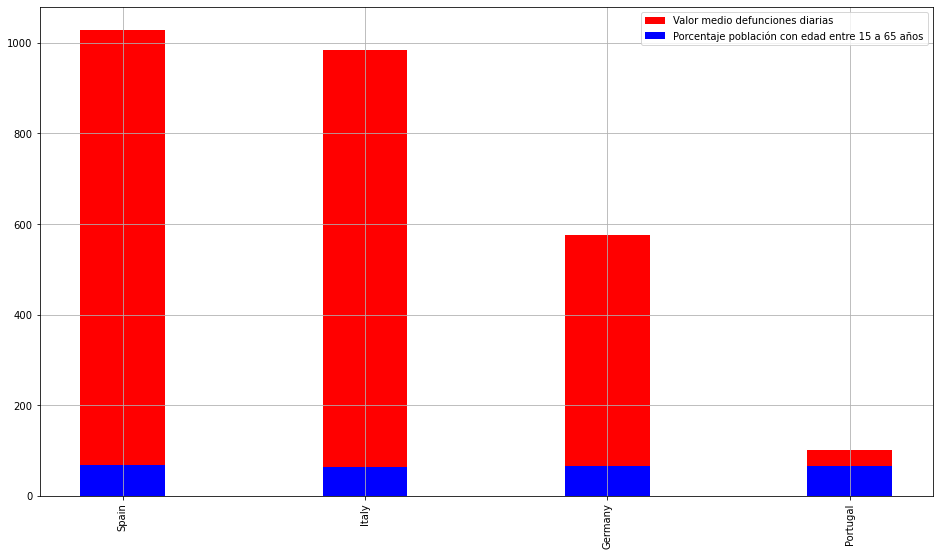

In [88]:
bar_comparacion(L_mean_NA_F,L_entre15_65_pob,"Valor medio defunciones diarias","Porcentaje población con edad entre 15 a 65 años",'defunciones')

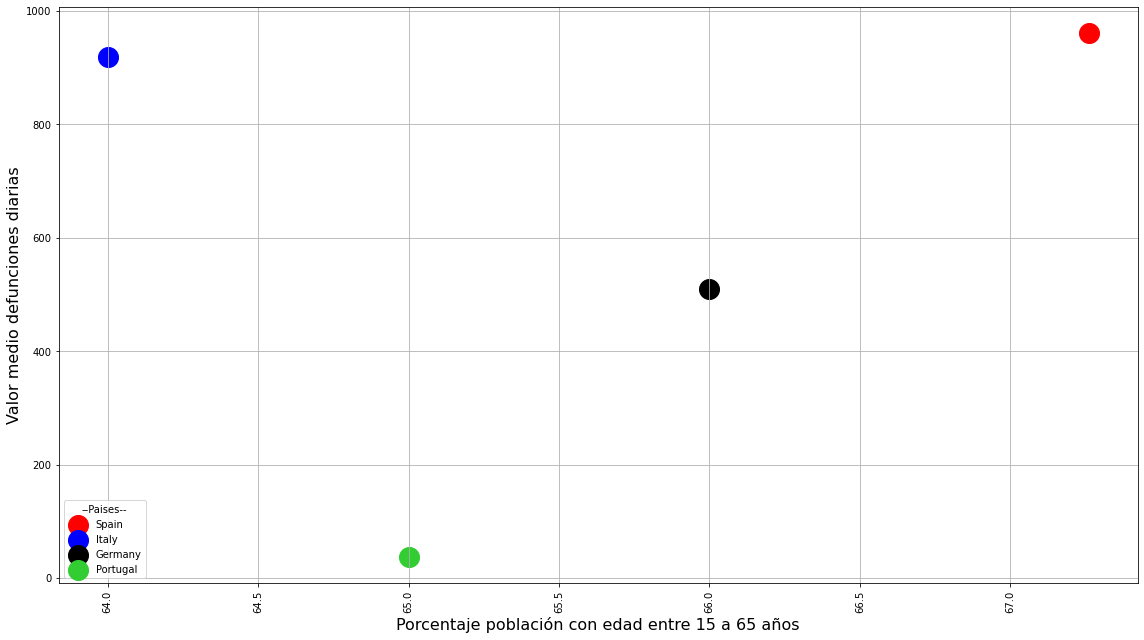

In [89]:
graf_bidimencional(L_entre15_65_pob,L_mean_NA_F,"Porcentaje población con edad entre 15 a 65 años",
                   "Valor medio defunciones diarias",400)

#### Influencia de la población con 65 años o más en la incidencia acumulada en defunciones

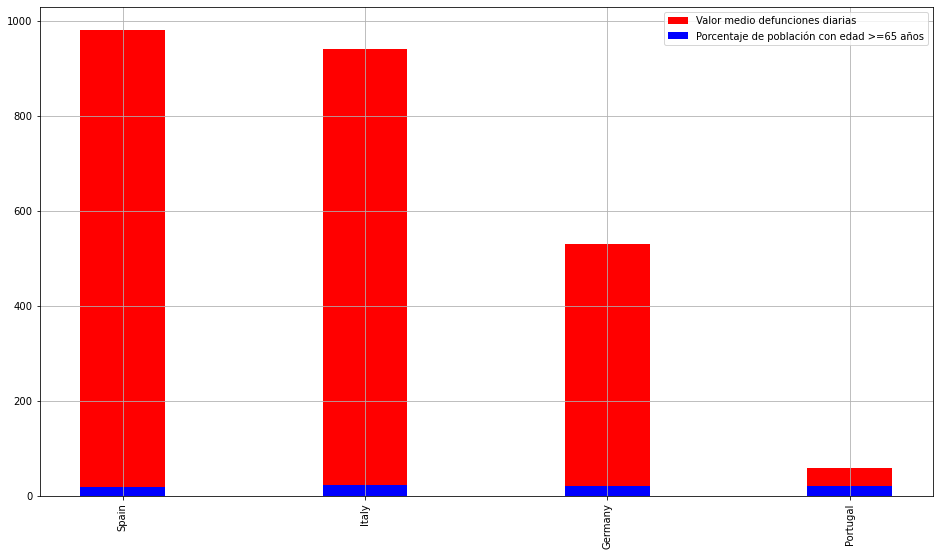

In [90]:
bar_comparacion(L_mean_NA_F,L_mayores65_pob,"Valor medio defunciones diarias","Porcentaje de población con edad >=65 años",'defunciones')

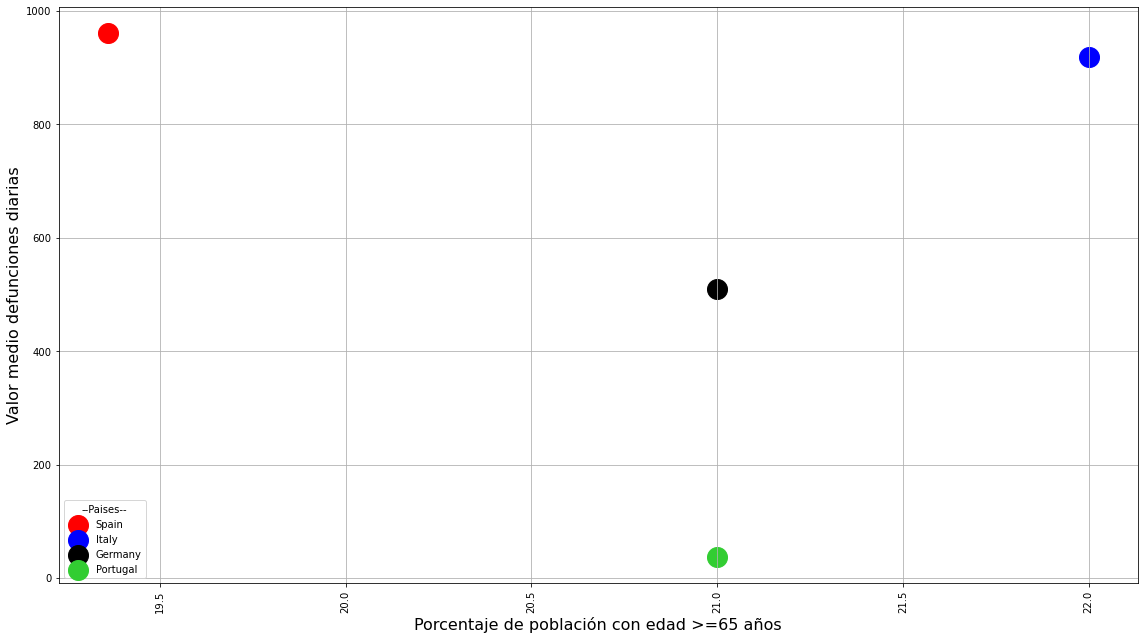

In [91]:
graf_bidimencional(L_mayores65_pob,L_mean_NA_F,"Porcentaje de población con edad >=65 años",
                   "Valor medio defunciones diarias",400)

#### Influencia del nº de camas de UCI en la incidencia acumulada en defunciones

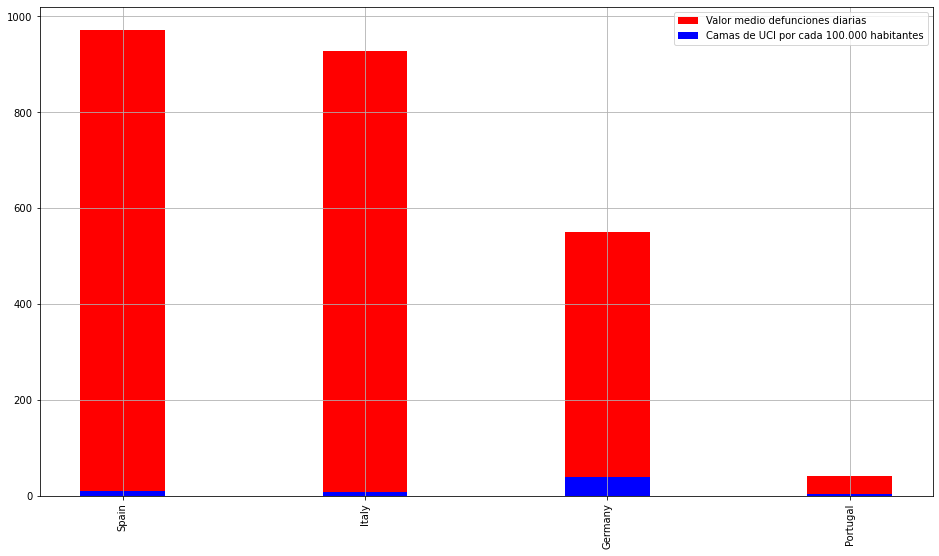

In [92]:
bar_comparacion(L_mean_NA_F,L_camas_UCI,"Valor medio defunciones diarias","Camas de UCI por cada 100.000 habitantes",'defunciones')

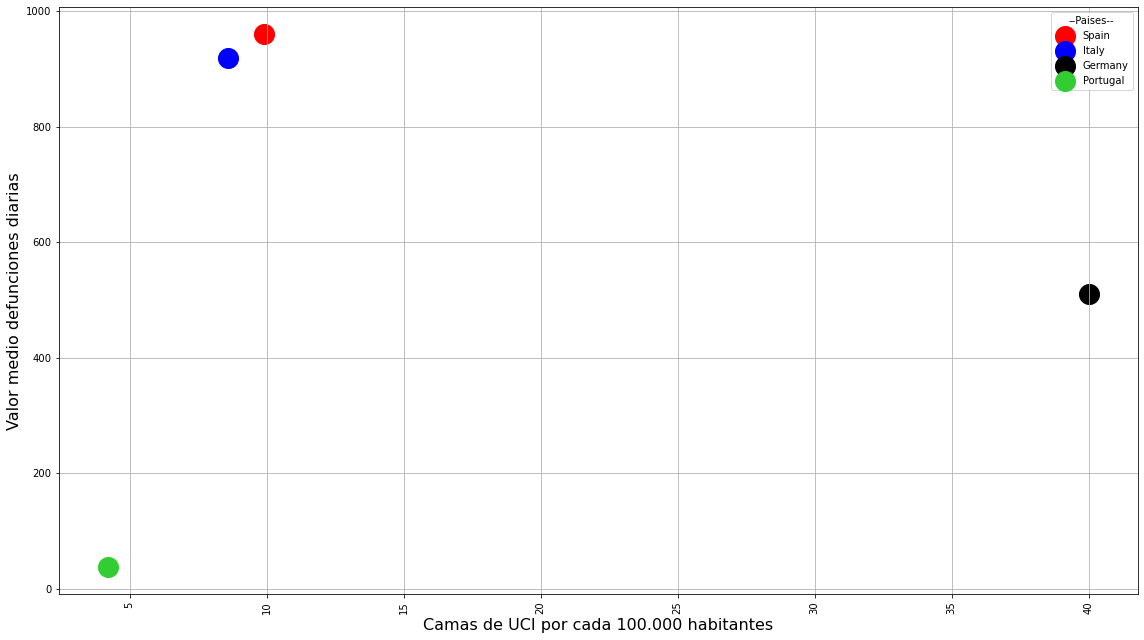

In [93]:
graf_bidimencional(L_camas_UCI,L_mean_NA_F,"Camas de UCI por cada 100.000 habitantes",
                   "Valor medio defunciones diarias",400)